In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys
from glob import glob

In [3]:
import psutil
import os
import time
import sys
import math
from contextlib import contextmanager

@contextmanager
def trace(title):
    t0 = time.time()
    p = psutil.Process(os.getpid())
    m0 = p.memory_info()[0] / 2. ** 30
    yield
    m1 = p.memory_info()[0] / 2. ** 30
    delta = m1 - m0
    sign = '+' if delta >= 0 else '-'
    delta = math.fabs(delta)
    print(f"[{m1:.1f}GB({sign}{delta:.1f}GB):{time.time() - t0:.1f}sec] {title} ", file=sys.stderr)

In [4]:
tar_files = []
for p in glob('../data/GSE117295_RAW/*csv'):
    if "CT" in p:
        tar_files.append(p)
tar_files.sort()

In [5]:
tar_files

['../data/GSE117295_RAW/GSM3290582_CT14.csv',
 '../data/GSE117295_RAW/GSM3290583_CT18.csv',
 '../data/GSE117295_RAW/GSM3290584_CT22.csv',
 '../data/GSE117295_RAW/GSM3290585_CT26.csv',
 '../data/GSE117295_RAW/GSM3290586_CT30.csv',
 '../data/GSE117295_RAW/GSM3290587_CT34.csv',
 '../data/GSE117295_RAW/GSM3290588_CT38.csv',
 '../data/GSE117295_RAW/GSM3290589_CT42.csv',
 '../data/GSE117295_RAW/GSM3290590_CT46.csv',
 '../data/GSE117295_RAW/GSM3290591_CT50.csv',
 '../data/GSE117295_RAW/GSM3290592_CT54.csv',
 '../data/GSE117295_RAW/GSM3290593_CT58.csv']

In [6]:
len(tar_files) * 3000

36000

In [7]:
df = pd.read_csv(tar_files[0])

In [8]:
df.shape

(26469, 6563)

In [9]:
df = df.astype(np.int16).transpose()
df.head()

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,n-R5s202,n-R5s210,n-R5s211,n-R5s213,n-R5s25,n-R5s33,n-R5s47,n-R5s7,n-R5s88,n-R5s96
TAAAGTCGTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATAACTGATGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGTGTGTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAGTCGCCGTTC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CCAGAAAGGATA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


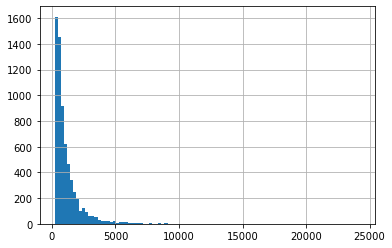

In [10]:
df.sum(1).hist(bins=100)

(0.0, 300.0)

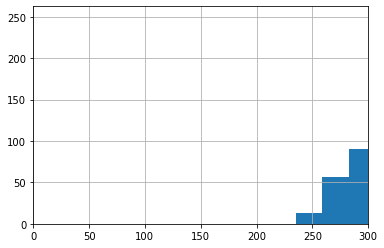

In [11]:
df.sum(1).hist(bins=1000)
plt.xlim([0, 300])

In [12]:
(df.sum(1) > 800).sum()

3098

In [13]:
(df.sum(1) <= 800).sum()

3465

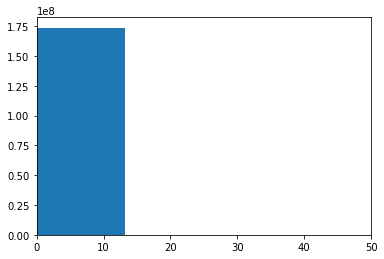

In [14]:
plt.figure()
plt.hist(df.values.flatten(), bins=100)
plt.xlim([0, 50])
plt.show()

In [15]:
mito_gene = df.columns[df.columns.str.contains('mt-')].values

In [16]:
df.loc[:, mito_gene]

,mt-Atp6,mt-Co1,mt-Co2,mt-Co3,mt-Cytb,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd5,...,mt-Tl2,mt-Tm,mt-Tp,mt-Tq,mt-Tr,mt-Ts2,mt-Tt,mt-Tv,mt-Tw,mt-Ty
TAAAGTCGTGAT,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATAACTGATGT,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGTGTGTCC,0,0,0,0,3,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
GAGTCGCCGTTC,0,0,0,0,4,6,3,0,2,2,...,0,0,0,0,0,0,0,0,0,0
CCAGAAAGGATA,0,1,0,0,3,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCTATGCTATCA,0,5,0,0,41,20,17,0,19,10,...,0,0,0,0,0,0,0,0,0,0
GCGCTCTAACAA,0,1,0,0,54,9,12,0,30,3,...,0,0,0,0,0,1,0,0,0,0
TACTCGTCCATT,0,4,0,0,38,16,9,0,19,4,...,0,0,0,0,0,0,0,1,0,0
AGAAGTGCGAGC,0,1,0,0,34,11,6,0,23,3,...,1,0,1,0,0,0,0,1,0,0


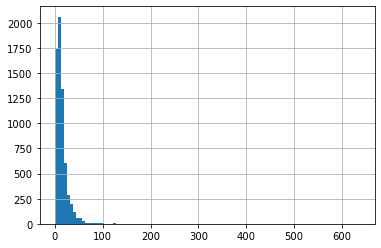

In [17]:
df.loc[:, mito_gene].sum(1).hist(bins=100)

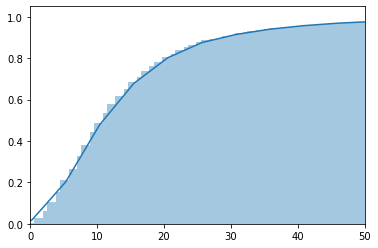

In [18]:
plt.figure()
sns.distplot(df.loc[:, mito_gene].sum(1), bins=1000, kde_kws={"cumulative": True}, hist_kws={"cumulative": True})
plt.xlim([0, 50])
plt.show()

In [19]:
(df.loc[:, mito_gene].sum(1) <= 10).values

array([ True,  True,  True, ..., False, False, False])

In [20]:
df.iloc[(df.loc[:, mito_gene].sum(1) <= 10).values]

,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,...,n-R5s202,n-R5s210,n-R5s211,n-R5s213,n-R5s25,n-R5s33,n-R5s47,n-R5s7,n-R5s88,n-R5s96
TAAAGTCGTGAT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CATAACTGATGT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAAGTGTGTCC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACATATACGGCG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GTCCAAAATCAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CTCACAATCTAA,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACTAACATTCCA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAAATGTCAGAC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATAATGACTGTC,0,1,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tar_files[0::3]

['../data/GSE117295_RAW/GSM3290582_CT14.csv',
 '../data/GSE117295_RAW/GSM3290585_CT26.csv',
 '../data/GSE117295_RAW/GSM3290588_CT38.csv',
 '../data/GSE117295_RAW/GSM3290591_CT50.csv']

In [22]:
df_list = []

with trace('load DataFrame'):
    for path in tar_files[0::3]:
        df = pd.read_csv(path).transpose()
        df["ct"] = int(path.split('CT')[1].split('.')[0])
        df = df.astype(np.int16)
#         mito_gene = df.columns[df.columns.str.contains('mt-')].values
#         df = df.iloc[(df.loc[:, mito_gene].sum(1) <= 10).values]
        df_list.append(df)

[3.2GB(+1.6GB):42.5sec] load DataFrame 


In [23]:
with trace('concat DataFrame'):
    df_concat = pd.concat(df_list, axis=0)

[4.0GB(+0.8GB):2.4sec] concat DataFrame 


In [24]:
df_concat = df_concat.fillna(0).astype(np.int16)

In [25]:
df_concat.shape

(20159, 31068)

In [26]:
for d in df_list:
    print(d.shape)

(6563, 26470)
(5840, 26336)
(3989, 25258)
(3767, 25730)


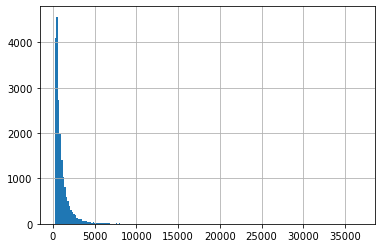

In [27]:
df_concat.sum(1).hist(bins=200)

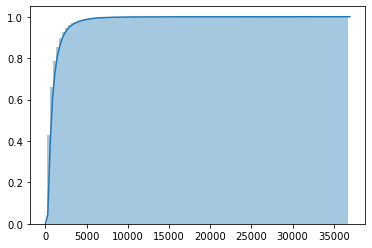

In [28]:
plt.figure()
sns.distplot(df_concat.sum(1), bins=100, kde_kws={"cumulative": True}, hist_kws={"cumulative": True})

In [29]:
(df_concat.sum(1) <= 800).sum()

11452

In [30]:
(df_concat.sum(1) > 800).sum()

8707

In [31]:
((df_concat > 0).sum(1) > 800).sum()

5244

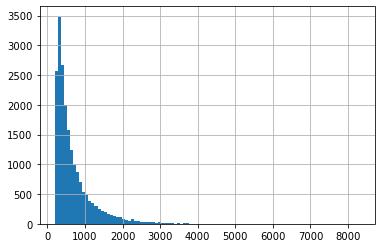

In [32]:
(df_concat > 0).sum(1).hist(bins=100)

(0.0, 1000.0)

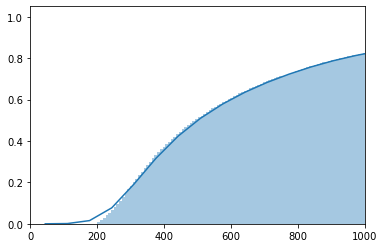

In [33]:
plt.figure()
sns.distplot((df_concat > 0).sum(1), bins=1000, kde_kws={"cumulative": True}, hist_kws={"cumulative": True})
plt.xlim([0, 1000])

In [36]:
df_train = df_concat[(df_concat > 0).sum(1) > 800]
df_test = df_concat[(df_concat > 0).sum(1) <= 800]

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5244 entries, GCCTGTCAACTA to GACTAAAAGTGT
Columns: 31068 entries, 0610007P14Rik to n-R5s93
dtypes: int16(31068)
memory usage: 310.8+ MB


In [38]:
df_train.to_csv('../data/train_batch1.csv')
df_test.to_csv('../data/test_batch1.csv')